In [1]:
import requests
import time
import pandas as pd

In [2]:
from dotenv import load_dotenv
import os

load_dotenv()  # loads variables from .env into environment

mapbox_api_key = os.getenv('MAPBOX_API_KEY')
census_api_key = os.getenv('CENSUS_API_KEY')

print(mapbox_api_key)  # Just to check it loads


pk.eyJ1IjoiY2Fycmllcm9iaW4iLCJhIjoiY21jM2ltdTlyMDU1NTJrb2ZnMnFiazRqeiJ9.RT-SWZnQIo_Z7zSOdRh_vg


In [ ]:



VARIABLES = [
    "NAME",
    "B02001_001E","B02001_002E","B02001_003E","B02001_004E",
    "B02001_005E","B02001_006E","B02001_007E","B02001_008E",
    "B01001_002E","B01001_026E",
    "B19013_001E",
    "B17001_001E","B17001_002E"
]

# All 50 states + DC (FIPS codes 01–56, skipping 3 U.S. territories)
state_fips = [f"{i:02d}" for i in range(1, 57) if i not in [3, 7, 14, 43, 52]]  # exclude territories

all_data = []

for state in state_fips:
    print(f"Fetching data for state {state}...")
    try:
        r = requests.get(
            "https://api.census.gov/data/2020/acs/acs5",
            params={
                "get": ",".join(VARIABLES),
                "for": "tract:*",
                "in": f"state:{state} county:*",
                "key": CENSUS_API_KEY
            }
        )
        r.raise_for_status()
        data = r.json()
        df = pd.DataFrame(data[1:], columns=data[0])
        all_data.append(df)
        time.sleep(1)  # be kind to the API
    except Exception as e:
        print(f"Failed for state {state}: {e}")

# Combine all results
tracts = pd.concat(all_data, ignore_index=True)
tracts.to_csv("acs2020_all_states_tracts.csv", index=False)
print("Done.")

# clinic_census= pd.read_csv('df2025_full_census.csv')
# tracts= pd.read_csv('acs2022_all_states_tracts.csv')

# tracts.info()


# tracts["census_tract"] = (
#     tracts["state"].str.zfill(2) +
#     tracts["county"].str.zfill(3) +
#     tracts["tract"].str.zfill(6)
# )



Fetching data for state 01...
Fetching data for state 02...
Fetching data for state 04...
Fetching data for state 05...
Fetching data for state 06...
Fetching data for state 08...
Fetching data for state 09...
Fetching data for state 10...
Fetching data for state 11...
Fetching data for state 12...
Fetching data for state 13...
Fetching data for state 15...
Fetching data for state 16...
Fetching data for state 17...
Fetching data for state 18...
Fetching data for state 19...
Fetching data for state 20...
Fetching data for state 21...
Fetching data for state 22...
Fetching data for state 23...
Fetching data for state 24...
Fetching data for state 25...
Fetching data for state 26...
Fetching data for state 27...
Fetching data for state 28...
Fetching data for state 29...
Fetching data for state 30...
Fetching data for state 31...
Fetching data for state 32...
Fetching data for state 33...
Fetching data for state 34...
Fetching data for state 35...
Fetching data for state 36...
Fetching d

In [3]:
tracts["census_tract"] = (
    tracts["state"].astype(str).str.zfill(2) +
    tracts["county"].astype(str).str.zfill(3) +
    tracts["tract"].astype(str).str.zfill(6)
)
print(tracts["census_tract"].head())
print(tracts["census_tract"].str.len().value_counts())

tracts.to_csv("acs2020_census_tract.csv", index=False)

0    01073003600
1    01073003700
2    01073003802
3    01073003803
4    01073003900
Name: census_tract, dtype: object
census_tract
11    84414
Name: count, dtype: int64


In [4]:
_tracts = pd.read_csv("acs2020_census_tract.csv")
clinic_census = pd.read_csv("df2025_full_census.csv", dtype={'census_tract': str})


_tracts["census_tract"] = _tracts["census_tract"].astype(str).str.zfill(11)
clinic_census["census_tract"] = clinic_census["census_tract"].astype(str).str.zfill(11)

print(_tracts['census_tract'].nunique())
print(clinic_census['census_tract'].nunique())

84414
6652


In [5]:
clinic_census = pd.read_csv("df2025_full_census.csv")
print(clinic_census.shape)
print(clinic_census.columns)
clinic_census.head()

(7556, 147)
Index(['CMS Certification Number (CCN)', 'Network', 'Facility Name',
       'Five Star Date', 'Five Star', 'Five Star Data Availability Code',
       'Address Line 1', 'Address Line 2', 'City/Town', 'State',
       ...
       'Percentage of Adult patients with long term catheter in use',
       'nPCR Data Availability Code', 'Number of patients in nPCR summary',
       'Number of patient-months in nPCR summary',
       'Percentage of pediatric HD patients with nPCR', 'dfc_new',
       'full_address', 'latitude', 'longitude', 'census_tract'],
      dtype='object', length=147)


,CMS Certification Number (CCN),Network,Facility Name,Five Star Date,Five Star,Five Star Data Availability Code,Address Line 1,Address Line 2,City/Town,State,...,Percentage of Adult patients with long term catheter in use,nPCR Data Availability Code,Number of patients in nPCR summary,Number of patient-months in nPCR summary,Percentage of pediatric HD patients with nPCR,dfc_new,full_address,latitude,longitude,census_tract
0,12306,8,CHILDRENS HOSPITAL DIALYSIS,01Jan2020-31Dec2023,NaN,260,1600 7TH AVENUE SOUTH,NaN,BIRMINGHAM,AL,...,NaN,1,24.0,175.0,99.0,existing,"1600 7TH AVENUE SOUTH, BIRMINGHAM, AL 35233",33.504018,-86.805215,1.073005e+09
1,12500,8,FMC CAPITOL CITY,01Jan2020-31Dec2023,1.0,1,255 S JACKSON STREET,NaN,MONTGOMERY,AL,...,16.0,259,0.0,NaN,NaN,existing,"255 S JACKSON STREET, MONTGOMERY, AL 36104",32.374048,-86.295939,1.101001e+09
2,12501,8,DaVita Gadsden Dialysis,01Jan2020-31Dec2023,2.0,1,409 SOUTH FIRST STREET,NaN,GADSDEN,AL,...,12.0,259,0.0,NaN,NaN,existing,"409 SOUTH FIRST STREET, GADSDEN, AL 35901",34.006750,-86.003132,1.055001e+09
3,12502,8,DaVita Tuscaloosa University Dialysis,01Jan2020-31Dec2023,1.0,1,220 15TH STREET,NaN,TUSCALOOSA,AL,...,11.0,259,0.0,NaN,NaN,existing,"220 15TH STREET, TUSCALOOSA, AL 35401",33.198990,-87.538230,1.125012e+09
4,12505,8,DaVita PDI-Montgomery,01Jan2020-31Dec2023,3.0,1,1001 FOREST AVENUE,NaN,MONTGOMERY,AL,...,14.0,259,0.0,NaN,NaN,existing,"1001 FOREST AVENUE, MONTGOMERY, AL 36106",32.369331,-86.285969,1.101001e+09


In [6]:
print(clinic_census['census_tract'].isna().sum())


1


In [7]:
print(clinic_census['census_tract'].head(10))

0    1.073005e+09
1    1.101001e+09
2    1.055001e+09
3    1.125012e+09
4    1.101001e+09
5    1.069040e+09
6    1.097003e+09
7    1.073006e+09
8    1.047957e+09
9    1.017955e+09
Name: census_tract, dtype: float64


In [8]:
print(clinic_census['census_tract'].dtypes)

float64


In [9]:
clinic_census['census_tract'] = clinic_census['census_tract'].apply(lambda x: str(int(x)).zfill(11) if pd.notnull(x) else None)

In [10]:
print(clinic_census['census_tract'].head(10))

0    01073004502
1    01101000600
2    01055001200
3    01125012002
4    01101000600
5    01069040204
6    01097002700
7    01073005903
8    01047956800
9    01017954600
Name: census_tract, dtype: object


In [11]:
_tracts['census_tract'] = _tracts['census_tract'].astype(str).str.strip().str.zfill(11)
clinic_census['census_tract'] = clinic_census['census_tract'].astype(str).str.strip().str.zfill(11)

# _tracts = _tracts[_tracts['census_tract'].str.match(r'^\d{11}$')]
# clinic_census = clinic_census[clinic_census['census_tract'].str.match(r'^\d{11}$')]

print(clinic_census['census_tract'].unique())
print(clinic_census['census_tract'].str.len().value_counts())


['01073004502' '01101000600' '01055001200' ... '13153020800' '13247060312'
 '13121011652']
census_tract
11    7556
Name: count, dtype: int64


In [12]:
#create percentage variables
# Avoid division by zero
_tracts['B02001_002E'] = _tracts['B02001_002E'].astype(float)
_tracts['B02001_001E'] = _tracts['B02001_001E'].astype(float)
_tracts['B02001_003E'] = _tracts['B02001_003E'].astype(float)
_tracts['B17001_002E'] = _tracts['B17001_002E'].astype(float)
_tracts['B17001_001E'] = _tracts['B17001_001E'].astype(float)

_tracts["pct_white"] = _tracts["B02001_002E"] / _tracts["B02001_001E"]
_tracts["pct_black"] = _tracts["B02001_003E"] / _tracts["B02001_001E"]
_tracts["pct_poverty"] = _tracts["B17001_002E"] / _tracts["B17001_001E"]

_tracts['pct_poverty'].describe()

count    83400.000000
mean         0.138391
std          0.115121
min          0.000000
25%          0.056153
50%          0.106053
75%          0.187936
max          1.000000
Name: pct_poverty, dtype: float64

In [13]:
print("Demo sample tracts:", _tracts["census_tract"].unique()[:5])


Demo sample tracts: ['01073003600' '01073003700' '01073003802' '01073003803' '01073003900']


In [14]:
print(clinic_census.columns)
print(clinic_census.head(5))

Index(['CMS Certification Number (CCN)', 'Network', 'Facility Name',
       'Five Star Date', 'Five Star', 'Five Star Data Availability Code',
       'Address Line 1', 'Address Line 2', 'City/Town', 'State',
       ...
       'Percentage of Adult patients with long term catheter in use',
       'nPCR Data Availability Code', 'Number of patients in nPCR summary',
       'Number of patient-months in nPCR summary',
       'Percentage of pediatric HD patients with nPCR', 'dfc_new',
       'full_address', 'latitude', 'longitude', 'census_tract'],
      dtype='object', length=147)
   CMS Certification Number (CCN)  Network  \
0                           12306        8   
1                           12500        8   
2                           12501        8   
3                           12502        8   
4                           12505        8   

                           Facility Name       Five Star Date  Five Star  \
0            CHILDRENS HOSPITAL DIALYSIS  01Jan2020-31Dec2023    

In [15]:
print("Clinic sample tracts:", clinic_census["census_tract"].unique()[:5])

Clinic sample tracts: ['01073004502' '01101000600' '01055001200' '01125012002' '01069040204']


In [16]:
# Merge on the 'census_tract' column
clinic_with_demo = clinic_census.merge(
    _tracts,
    on="census_tract",
    how="left"  # keep all clinics, even if no match
)

clinic_with_demo.info()
clinic_with_demo.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7556 entries, 0 to 7555
Columns: 167 entries, CMS Certification Number (CCN) to pct_poverty
dtypes: float64(97), int64(27), object(43)
memory usage: 9.6+ MB


,CMS Certification Number (CCN),Network,Facility Name,Five Star Date,Five Star,Five Star Data Availability Code,Address Line 1,Address Line 2,City/Town,State,...,B01001_026E,B19013_001E,B17001_001E,B17001_002E,state,county,tract,pct_white,pct_black,pct_poverty
0,12306,8,CHILDRENS HOSPITAL DIALYSIS,01Jan2020-31Dec2023,NaN,260,1600 7TH AVENUE SOUTH,NaN,BIRMINGHAM,AL,...,1739.0,17400.0,2953.0,1589.0,1.0,73.0,4502.0,0.407848,0.366999,0.538097
1,12500,8,FMC CAPITOL CITY,01Jan2020-31Dec2023,1.0,1,255 S JACKSON STREET,NaN,MONTGOMERY,AL,...,945.0,16582.0,1658.0,924.0,1.0,101.0,600.0,0.049209,0.947862,0.557298
2,12501,8,DaVita Gadsden Dialysis,01Jan2020-31Dec2023,2.0,1,409 SOUTH FIRST STREET,NaN,GADSDEN,AL,...,1475.0,40639.0,2663.0,352.0,1.0,55.0,1200.0,0.738641,0.167480,0.132182
3,12502,8,DaVita Tuscaloosa University Dialysis,01Jan2020-31Dec2023,1.0,1,220 15TH STREET,NaN,TUSCALOOSA,AL,...,627.0,22723.0,1188.0,853.0,1.0,125.0,12002.0,0.900673,0.021886,0.718013
4,12505,8,DaVita PDI-Montgomery,01Jan2020-31Dec2023,3.0,1,1001 FOREST AVENUE,NaN,MONTGOMERY,AL,...,945.0,16582.0,1658.0,924.0,1.0,101.0,600.0,0.049209,0.947862,0.557298


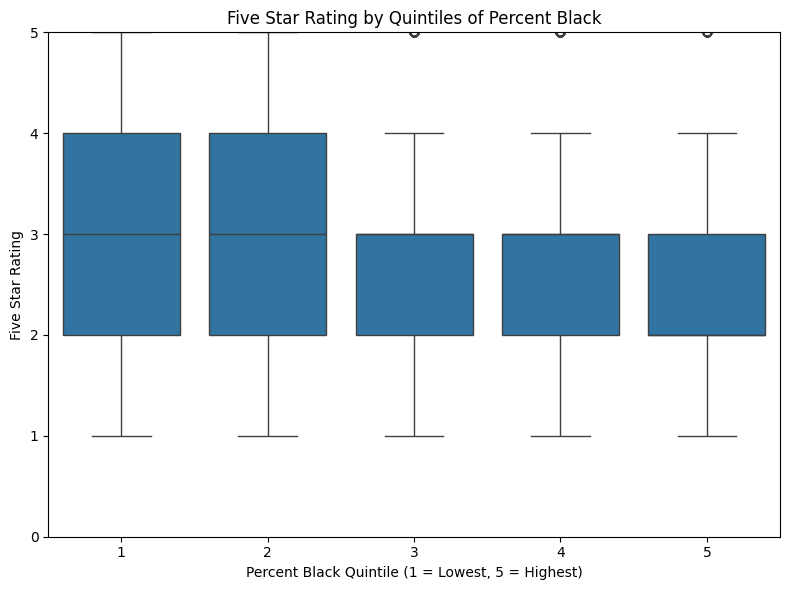

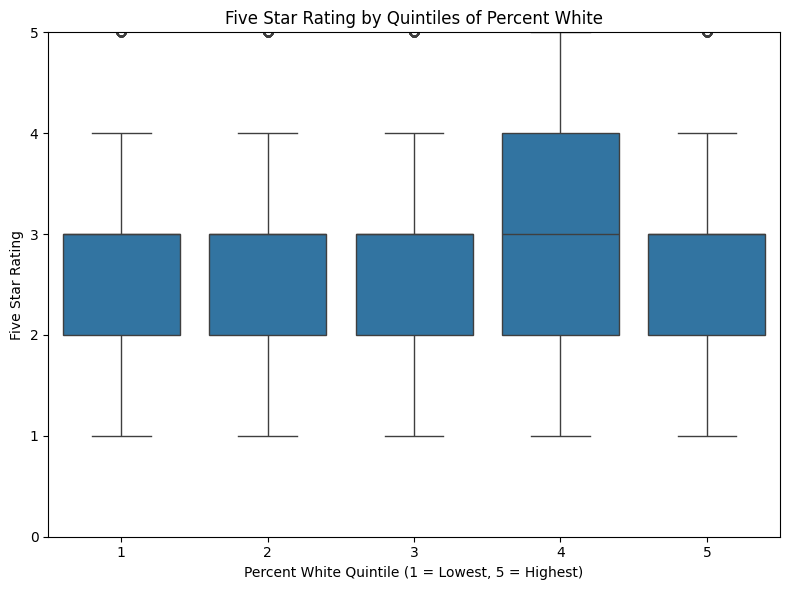

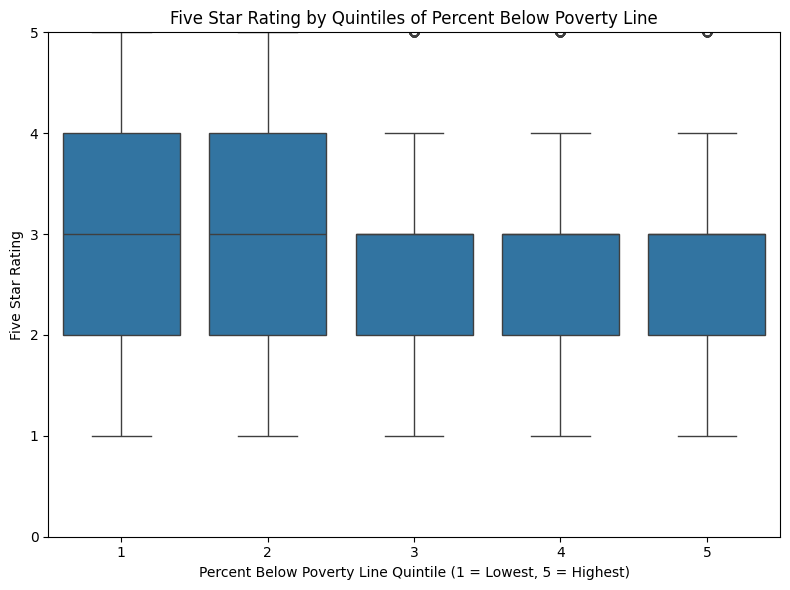

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create quintiles
clinic_with_demo['black_quintile'] = pd.qcut(clinic_with_demo['pct_black'], q=5, labels=[1, 2, 3, 4, 5])
clinic_with_demo['white_quintile'] = pd.qcut(clinic_with_demo['pct_white'], q=5, labels=[1, 2, 3, 4, 5])
clinic_with_demo['poverty_quintile'] = pd.qcut(clinic_with_demo['pct_poverty'], q=5, labels=[1, 2, 3, 4, 5])

# Step 2: Ensure Five Star is numeric
clinic_with_demo['Five Star'] = pd.to_numeric(clinic_with_demo['Five Star'], errors='coerce')

# Step 3: Melt the data
clinic_with_demo_melted = clinic_with_demo.melt(
    id_vars='Five Star',
    value_vars=['black_quintile', 'white_quintile', 'poverty_quintile'],
    var_name='Demographic',
    value_name='Quintile'
)

# Step 4: Define label mapping
label_map = {
    'black_quintile': 'Percent Black',
    'white_quintile': 'Percent White',
    'poverty_quintile': 'Percent Below Poverty Line'
}

# Step 5: Plot by filtering melted dataframe
for key, label in label_map.items():
    subset = clinic_with_demo_melted[clinic_with_demo_melted['Demographic'] == key]
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=subset, x='Quintile', y='Five Star')
    plt.title(f'Five Star Rating by Quintiles of {label}')
    plt.xlabel(f'{label} Quintile (1 = Lowest, 5 = Highest)')
    plt.ylabel('Five Star Rating')
    plt.ylim(0, 5)
    plt.tight_layout()
    plt.show()


In [18]:
clinic_with_demo.groupby('black_quintile')['Five Star'].mean()


# Group by quartile and get average five-star rating
quintile_summary = clinic_with_demo.groupby("black_quintile")["Five Star"].mean().reset_index()

# Rename columns for clarity in Datawrapper
quintile_summary.columns = ["Percentage of Black residents", "Average Five-Star Rating"]

# Save to CSV for Datawrapper
quintile_summary.to_csv("black_quintile_summary.csv", index=False)

C:\Users\Carrie Arnold\AppData\Local\Temp\ipykernel_28204\228883075.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clinic_with_demo.groupby('black_quintile')['Five Star'].mean()
C:\Users\Carrie Arnold\AppData\Local\Temp\ipykernel_28204\228883075.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quintile_summary = clinic_with_demo.groupby("black_quintile")["Five Star"].mean().reset_index()


In [19]:
clinic_with_demo.groupby('white_quintile')['Five Star'].mean()


# Group by quartile and get average five-star rating
quintile_white = clinic_with_demo.groupby("white_quintile")["Five Star"].mean().reset_index()

# Rename columns for clarity in Datawrapper
quintile_white.columns = ["Percentage of white residents", "Average Five-Star Rating"]

# Save to CSV for Datawrapper
quintile_white.to_csv("white_quintile_summary.csv", index=False)

C:\Users\Carrie Arnold\AppData\Local\Temp\ipykernel_28204\2006292836.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clinic_with_demo.groupby('white_quintile')['Five Star'].mean()
C:\Users\Carrie Arnold\AppData\Local\Temp\ipykernel_28204\2006292836.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quintile_white = clinic_with_demo.groupby("white_quintile")["Five Star"].mean().reset_index()


In [20]:
clinic_with_demo.groupby('poverty_quintile')['Five Star'].mean()


# Group by quartile and get average five-star rating
quintile_poverty = clinic_with_demo.groupby("poverty_quintile")["Five Star"].mean().reset_index()

# Rename columns for clarity in Datawrapper
quintile_poverty.columns = ["Percentage below the poverty line", "Average Five-Star Rating"]

# Save to CSV for Datawrapper
quintile_poverty.to_csv("poverty_quintile_summary.csv", index=False)

C:\Users\Carrie Arnold\AppData\Local\Temp\ipykernel_28204\2864888509.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clinic_with_demo.groupby('poverty_quintile')['Five Star'].mean()
C:\Users\Carrie Arnold\AppData\Local\Temp\ipykernel_28204\2864888509.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quintile_poverty = clinic_with_demo.groupby("poverty_quintile")["Five Star"].mean().reset_index()


In [21]:
# Calculate summary statistics
summary_stats = {}

for demo_var, label in label_map.items():
    stats = (
        clinic_with_demo
        .groupby(demo_var)['Five Star']
        .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
        .rename_axis(f'{label} Quintile')
    )
    summary_stats[label] = stats

# Display each table
for label, table in summary_stats.items():
    print(f"\n=== Five Star Ratings by {label} Quintile ===")
    print(table.round(2))



=== Five Star Ratings by Percent Black Quintile ===
                        count  mean  median   std  min  max
Percent Black Quintile                                     
1                        1382  3.01     3.0  1.06  1.0  5.0
2                        1394  3.02     3.0  1.09  1.0  5.0
3                        1372  2.88     3.0  1.06  1.0  5.0
4                        1398  2.72     3.0  1.06  1.0  5.0
5                        1394  2.47     2.0  1.03  1.0  5.0

=== Five Star Ratings by Percent White Quintile ===
                        count  mean  median   std  min  max
Percent White Quintile                                     
1                        1385  2.61     3.0  1.11  1.0  5.0
2                        1389  2.83     3.0  1.09  1.0  5.0
3                        1395  2.87     3.0  1.08  1.0  5.0
4                        1386  2.91     3.0  1.07  1.0  5.0
5                        1385  2.88     3.0  1.02  1.0  5.0

=== Five Star Ratings by Percent Below Poverty Line Q

C:\Users\Carrie Arnold\AppData\Local\Temp\ipykernel_28204\1348954956.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(demo_var)['Five Star']


In [22]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



<Axes: xlabel='Five Star', ylabel='pct_black'>

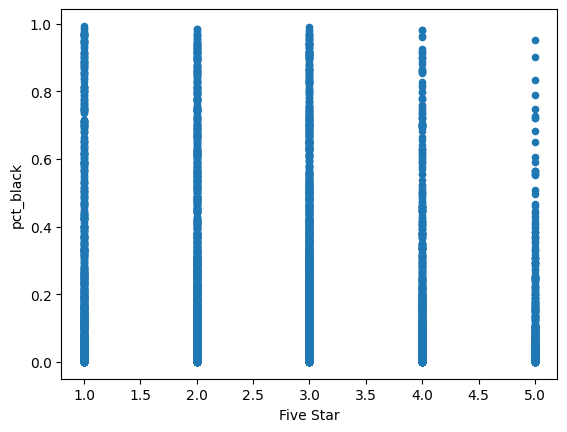

In [23]:
clinic_with_demo.plot(x='Five Star', y='pct_black', kind='scatter')

In [ ]:
#Set up linear regression models

# Filter to remove missing values
regression_df = clinic_with_demo[['Five Star', 'pct_poverty', 'pct_black']].dropna()

# Optional: check types
regression_df.dtypes


Five Star      float64
pct_poverty    float64
pct_black      float64
dtype: object

In [25]:
# Run simple linear regression with np.polyfit

slope_pov, intercept_pov = np.polyfit(regression_df['pct_poverty'], regression_df['Five Star'], 1)
print(f"Poverty regression: slope = {slope_pov:.3f}, intercept = {intercept_pov:.3f}")

slope_black, intercept_black = np.polyfit(regression_df['pct_black'], regression_df['Five Star'], 1)
print(f"Black population regression: slope = {slope_black:.3f}, intercept = {intercept_black:.3f}")


Poverty regression: slope = -1.481, intercept = 3.051
Black population regression: slope = -0.889, intercept = 2.985


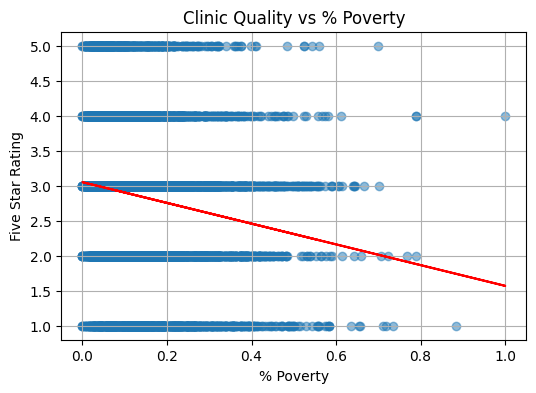

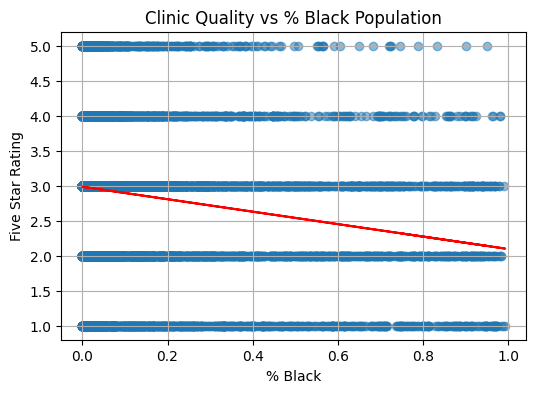

In [26]:
# create a plot of the regression model

import matplotlib.pyplot as plt

# Poverty
plt.figure(figsize=(6, 4))
plt.scatter(regression_df['pct_poverty'], regression_df['Five Star'], alpha=0.5)
plt.plot(regression_df['pct_poverty'],
         slope_pov * regression_df['pct_poverty'] + intercept_pov,
         color='red')
plt.title('Clinic Quality vs % Poverty')
plt.xlabel('% Poverty')
plt.ylabel('Five Star Rating')
plt.grid(True)
plt.show()

# Black Population
plt.figure(figsize=(6, 4))
plt.scatter(regression_df['pct_black'], regression_df['Five Star'], alpha=0.5)
plt.plot(regression_df['pct_black'],
         slope_black * regression_df['pct_black'] + intercept_black,
         color='red')
plt.title('Clinic Quality vs % Black Population')
plt.xlabel('% Black')
plt.ylabel('Five Star Rating')
plt.grid(True)
plt.show()


In [29]:
# multiple regression model

import statsmodels.api as sm

# Drop rows with missing or infinite values in the relevant columns
df_clean = clinic_with_demo[['Five Star', 'pct_poverty', 'pct_black']].replace([np.inf, -np.inf], np.nan).dropna()

# Define predictors and add constant
X = df_clean[['pct_poverty', 'pct_black']]
X = sm.add_constant(X)

# Define outcome variable
y = df_clean['Five Star']

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              Five Star   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sun, 27 Jul 2025   Prob (F-statistic):           1.24e-72
Time:                        21:56:36   Log-Likelihood:                -10213.
No. Observations:                6939   AIC:                         2.043e+04
Df Residuals:                    6936   BIC:                         2.045e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.0978      0.022    142.352      